### SPATIAL ANALYSIS OF TRACEROUTE DATA 
What are we trying to understand from the traceroute data when it comes to the spatial analysis?
- Does distance affect the traceroute variability patterns we are seeing ?
- Does the type of connection matter (fiber, wifi)?
- In prediction work,is distance all thats required or do we need more location data e.g  latitude and longitude data 


In [1]:
#import the necessary packages
import pandas as pd
import numpy  as np
import json
import math 
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
hfont = {'fontname':'Monaco'}

# Making the plots standard 
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,4]
plt.rcParams['font.size'] =  13 

In [2]:
#print seaborn version
import seaborn as sns
print('seaborn version: ', sns.__version__)

seaborn version:  0.13.0


In [3]:
#import the pickled dataframes you will be using for the experiments
latency_df = pd.read_pickle('traceroute.pickle')
distance_df = pd.read_pickle('distance.pickle')

#remove null values and anomalies 
latency_df['last_rtt'] = latency_df.groupby(latency_df.index)['avg_rtt'].transform('last')
latency_df = latency_df.dropna(subset=['last_rtt'])

#remove indexes where last_rtt is greater than 100ms 
latency_df = latency_df[latency_df['last_rtt'] < 100]
plot_df = latency_df.copy()
route_df = latency_df.copy()

In [4]:
#which pairs of probes are close to each other?
distance_df[distance_df['distance'] < 10] 

,source_prb_id,source_longitude,source_latitude,destination_prb_id,destination_longitude,destination_latitude,distance
1,33627,2.1885,41.4005,30381,2.1415,41.3775,4.688058
11,55787,2.1615,41.4105,30381,2.1415,41.3775,4.028670
12,55787,2.1615,41.4105,15632,2.0885,41.4685,8.872165


In [5]:
#Is the round trip time between these probes low?
#plotting the mean latency per day 
latency_df['date'] = latency_df['new_time'].dt.date
latency_df = latency_df.groupby(['date','prb_id','dst_id'], as_index=False).agg({col: 'first' if col != 'last_rtt' else 'mean' for col in latency_df.columns})

Text(0, 0.5, 'Mean latency (ms)')

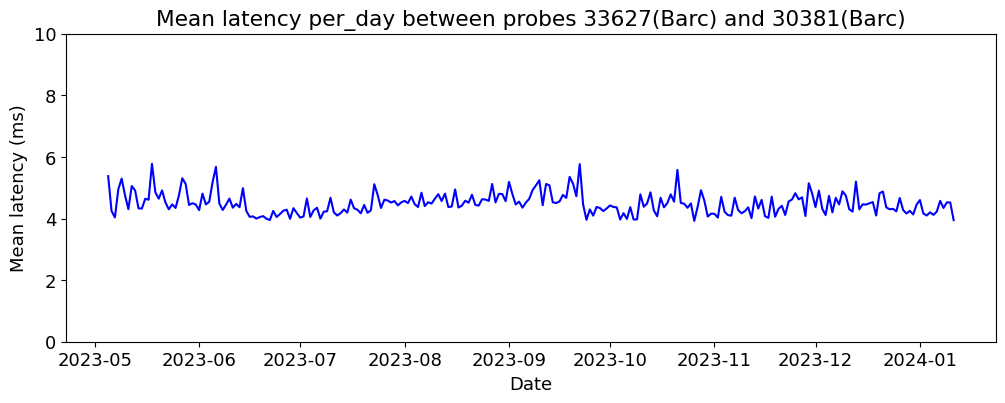

In [6]:
low_pair_one = latency_df[(latency_df['prb_id'] == 33627) & (latency_df['dst_id'] == '30381')]
#plot date against mean latency
plt.plot(low_pair_one['date'], low_pair_one['last_rtt'], color='blue', label='mean latency')
#add source and destination probe ids to the plot
plt.title('Mean latency per_day between probes 33627(Barc) and 30381(Barc)')
plt.ylim(0,10)
plt.xlabel('Date')
plt.ylabel('Mean latency (ms)')

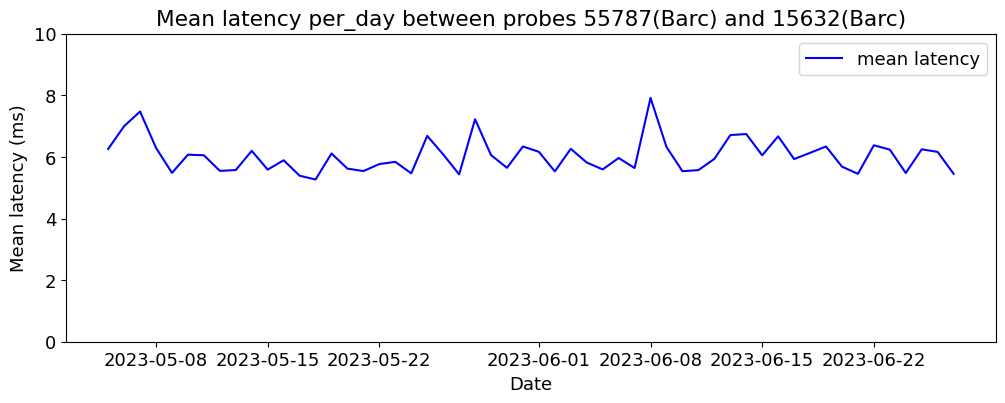

In [7]:
low_pair_two = latency_df[(latency_df['prb_id'] == 55787) & (latency_df['dst_id'] == '15632')]
#plot date against mean latency
plt.plot(low_pair_two['date'], low_pair_two['last_rtt'], color='blue', label='mean latency')
#add source and destination probe ids to the plot
plt.title('Mean latency per_day between probes 55787(Barc) and 15632(Barc)')
plt.ylim(0,10)
plt.xlabel('Date')
plt.ylabel('Mean latency (ms)')
plt.legend()

Text(0, 0.5, 'Mean latency (ms)')

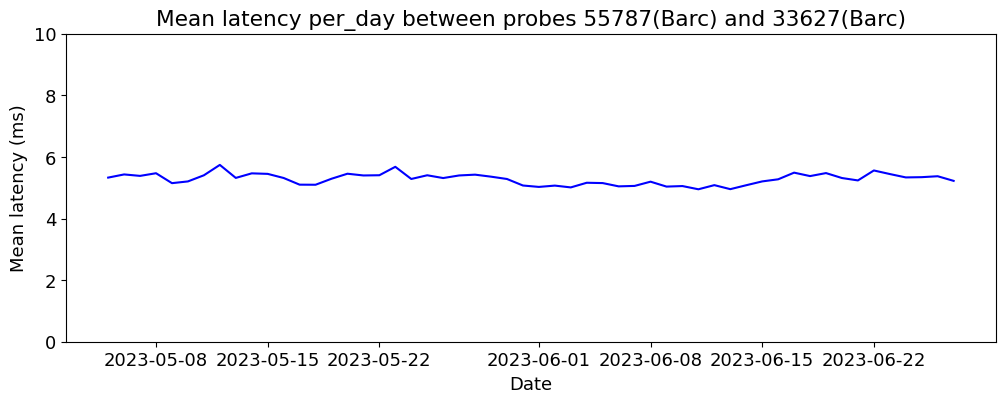

In [8]:
low_pair_three = latency_df[(latency_df['prb_id'] == 55787) & (latency_df['dst_id'] == '30381')]
#plot date against mean latency
plt.plot(low_pair_three['date'], low_pair_three['last_rtt'], color='blue', label='mean latency')
#add source and destination probe ids to the plot
plt.title('Mean latency per_day between probes 55787(Barc) and 33627(Barc)')
plt.ylim(0,10)
plt.xlabel('Date')
plt.ylabel('Mean latency (ms)')

In [9]:
#which pair of probes are far apart?
distance_df[distance_df['distance'] > 1000] 

,source_prb_id,source_longitude,source_latitude,destination_prb_id,destination_longitude,destination_latitude,distance
3,33627,2.1885,41.4005,1004200,-15.5025,28.0275,2188.880094
8,51265,3.0905,39.8495,1004200,-15.5025,28.0275,2154.391089
13,55787,2.1615,41.4105,1004200,-15.5025,28.0275,2187.750083
18,61357,-5.7005,43.3105,1004200,-15.5025,28.0275,1910.620996
23,15118,-3.6725,40.4515,1004200,-15.5025,28.0275,1753.453974


(30.0, 60.0)

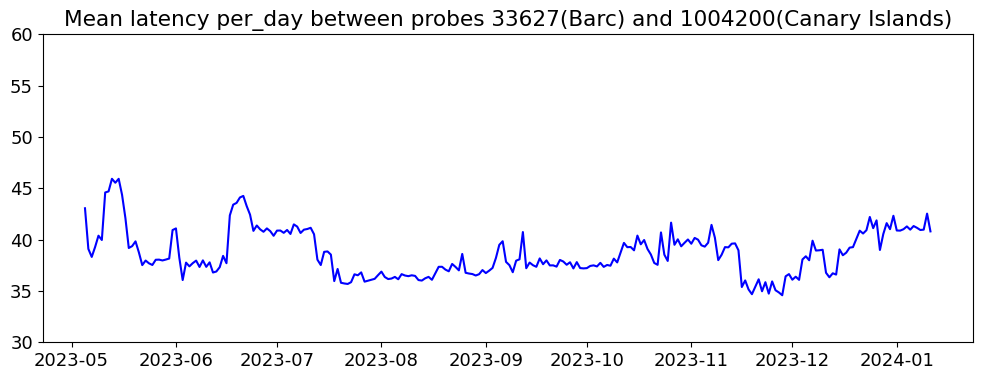

In [10]:
high_pair_one = latency_df[(latency_df['prb_id'] == 33627) & (latency_df['dst_id'] == '1004200')]
#plot date against mean latency
plt.plot(high_pair_one['date'], high_pair_one['last_rtt'], color='blue', label='mean latency')
#add source and destination probe ids to the plot
plt.title('Mean latency per_day between probes 33627(Barc) and 1004200(Canary Islands)')
plt.ylim(30,60)

(30.0, 60.0)

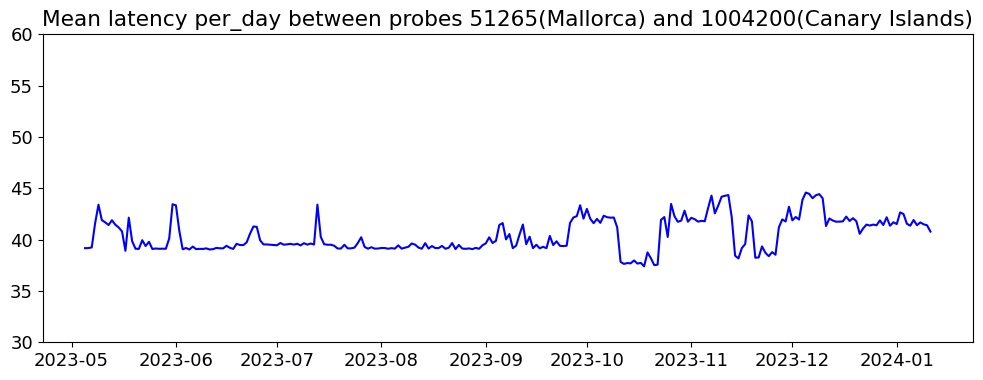

In [11]:
high_pair_two = latency_df[(latency_df['prb_id'] == 51265) & (latency_df['dst_id'] == '1004200')]
#plot date against mean latency
plt.plot(high_pair_two['date'], high_pair_two['last_rtt'], color='blue', label='mean latency')
#add source and destination probe ids to the plot
plt.title('Mean latency per_day between probes 51265(Mallorca) and 1004200(Canary Islands)')
plt.ylim(30,60)

(30.0, 60.0)

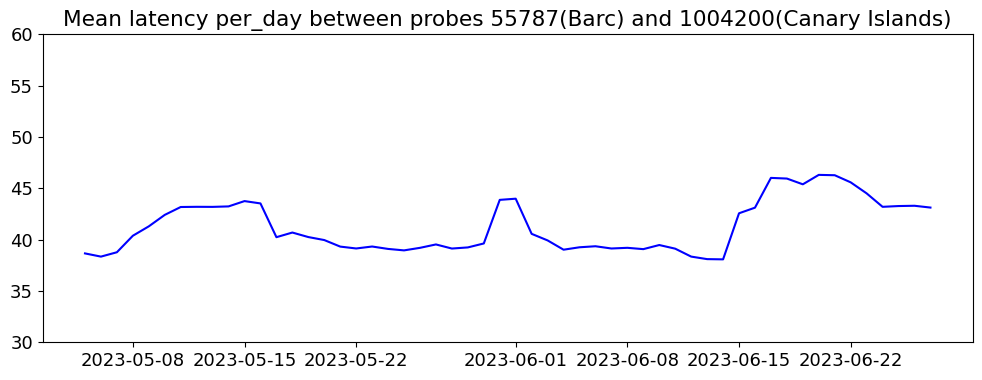

In [12]:
high_pair_three = latency_df[(latency_df['prb_id'] == 55787) & (latency_df['dst_id'] == '1004200')]
#plot date against mean latency
plt.plot(high_pair_three['date'], high_pair_three['last_rtt'], color='blue', label='mean latency')
#add source and destination probe ids to the plot
plt.title('Mean latency per_day between probes 55787(Barc) and 1004200(Canary Islands)')
plt.ylim(30,60)

### Visual Inspection findings 
1. Here we chose 3 pairs of probes one set with source/destination distance under 10kms and another 3 pairs with source/destination distance over 1000kms 
2. One of the sources probes (55787) was offline from 27th July 20023 and we use data from it till that day 
3. We can see that for the probes with distance under 10kms the rtt of the traceroute between the probes is essentially flat varying by as little as 2ms 
4. In the case of the probes that are 1000kms and above apart from each other the rtt varies from between 7ms to about 12ms.
5. There are no strong change patterns like step functions in both cases.

In [13]:
#does the nature of the link between the probes affect the latency?
#import the probe metadata
probe_meta = pd.read_pickle('probe_data.pickle')

#merge with the latency dataframe
source_merged_df  = pd.merge(latency_df, probe_meta, left_on='prb_id', right_on='ProbeID', how='left')
source_merged_df['dst_id'] = source_merged_df['dst_id'].astype('int64')
destination_merged_df = pd.merge(source_merged_df, probe_meta, left_on='dst_id', right_on='ProbeID', how='left', suffixes=('_source', '_destination'))

### Here i looked at the system and user defined tags to see what sort of connection was present between source and destination

In [14]:
low_pair_one = destination_merged_df[(destination_merged_df['prb_id'] == 33627) & (destination_merged_df['dst_id'] == 30381)]
low_pair_one[['Tags_source','Tags_destination']].head()

,Tags_source,Tags_destination
9,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
34,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
59,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
84,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
109,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."


#### Here both source and destination have fiber on the tags so we can assume the end to end connection is fiber 

In [15]:
low_pair_two = destination_merged_df[(destination_merged_df['prb_id'] == 55787) & (destination_merged_df['dst_id'] == 15632)]
low_pair_two[['Tags_source','Tags_destination']].head()

,Tags_source,Tags_destination
17,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...","[{'name': 'system: V3', 'slug': 'system-v3'}, ..."
42,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...","[{'name': 'system: V3', 'slug': 'system-v3'}, ..."
67,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...","[{'name': 'system: V3', 'slug': 'system-v3'}, ..."
92,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...","[{'name': 'system: V3', 'slug': 'system-v3'}, ..."
117,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...","[{'name': 'system: V3', 'slug': 'system-v3'}, ..."


### Probe 55787 and probe 15631 do not have any user defined tags just system tags 

In [16]:
low_pair_three = destination_merged_df[(destination_merged_df['prb_id'] == 55787) & (destination_merged_df['dst_id'] == 30381)]
low_pair_three[['Tags_source','Tags_destination']].head()

,Tags_source,Tags_destination
19,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
44,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
69,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
94,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
119,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."


#### In this case only the destination has the tag fiber so we can assume theres fiber at the destination

In [17]:
high_pair_one = destination_merged_df[(destination_merged_df['prb_id'] == 33627) & (destination_merged_df['dst_id'] == 1004200)]
high_pair_one[['Tags_source','Tags_destination']].head()

,Tags_source,Tags_destination
5,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
30,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
55,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
80,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
105,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."


In [18]:
high_pair_two = destination_merged_df[(destination_merged_df['prb_id'] == 51265) & (destination_merged_df['dst_id'] == 1004200)]
high_pair_two[['Tags_source','Tags_destination']].head()

,Tags_source,Tags_destination
10,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
35,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
60,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
85,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
110,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."


#### and here again we have fiber between source and destination 

In [19]:
high_pair_three = destination_merged_df[(destination_merged_df['prb_id'] == 55787) & (destination_merged_df['dst_id'] == 1004200)]
high_pair_three[['Tags_source','Tags_destination']].head()

,Tags_source,Tags_destination
15,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
40,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
65,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
90,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."
115,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...","[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ..."


-Finally, here we have fiber at the destination with no information about what is happening at the source.  
-Since most of the links are fiber(where information is available) i would say this is not a significant factor for consideration

In [20]:
## PREDICTION OF LATENCY WITH A RANDOM FOREST REGRESSOR
# SELECT THE LOW DISTANCE PROBES FROM THE LATENCY DATAFRAME
low_distance_df = destination_merged_df[destination_merged_df['distance'] < 10]

# SELECT THE HIGH DISTANCE PROBES FROM THE LATENCY DATAFRAME
high_distance_df = destination_merged_df[destination_merged_df['distance'] > 1000]



In [21]:
#use a random forest regressor to predict the latency between the low distance probes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#select the features to be used for the prediction
low_features = low_distance_df[['distance']]
low_target = low_distance_df['last_rtt']

#split the data into training and testing sets
low_X_train, low_X_test, low_y_train, low_y_test = train_test_split(low_features, low_target, test_size=0.2, random_state=42)

#train the model
low_regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
low_regr.fit(low_X_train, low_y_train)

#make predictions
low_y_pred = low_regr.predict(low_X_test)

#evaluate the model
print('root mean squared error: %.3f' % mean_squared_error(low_y_test, low_y_pred,squared=False))

root mean squared error: 0.352


In [22]:
#what happens to mse when we add latitude and longitude as features?
low_features = low_distance_df[['distance','Latitude_source','Longitude_source','Latitude_destination','Longitude_destination']]
low_target = low_distance_df['last_rtt']

#split the data into training and testing sets
low_X_train, low_X_test, low_y_train, low_y_test = train_test_split(low_features, low_target, test_size=0.2, random_state=42)

#train the model
low_regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
low_regr.fit(low_X_train, low_y_train)

#make predictions
low_y_pred = low_regr.predict(low_X_test)

#evaluate the model
print('root mean squared error: %.3f' % mean_squared_error(low_y_test, low_y_pred,squared=False))

root mean squared error: 0.352


In [23]:
#lets see how long distance probes perform
high_features = high_distance_df[['distance']]
high_target = high_distance_df['last_rtt']

#split the data into training and testing sets
high_X_train, high_X_test, high_y_train, high_y_test = train_test_split(high_features, high_target, test_size=0.2, random_state=42)

#train the model
high_regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
high_regr.fit(high_X_train, high_y_train)

#make predictions
high_y_pred = high_regr.predict(high_X_test)

#evaluate the model using root mean squared error
print('root mean squared error: %.3f' % mean_squared_error(high_y_test, high_y_pred,squared=False))

root mean squared error: 2.422


In [24]:
#what happens to mse when we add latitude and longitude as features?
high_features = high_distance_df[['distance','Latitude_source','Longitude_source','Latitude_destination','Longitude_destination']]
high_target = high_distance_df['last_rtt']

#split the data into training and testing sets
high_X_train, high_X_test, high_y_train, high_y_test = train_test_split(high_features, high_target, test_size=0.2, random_state=42)

#train the model
high_regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
high_regr.fit(high_X_train, high_y_train)

#make predictions
high_y_pred = high_regr.predict(high_X_test)

#evaluate the model
print('root mean squared error: %.3f' % mean_squared_error(high_y_test, high_y_pred,squared=False))

root mean squared error: 2.419


In [25]:
import seaborn as sns
boxplot_df = plot_df.copy()
boxplot_df = boxplot_df[['prb_id','dst_id','distance','src_names','dst_names','last_rtt']]

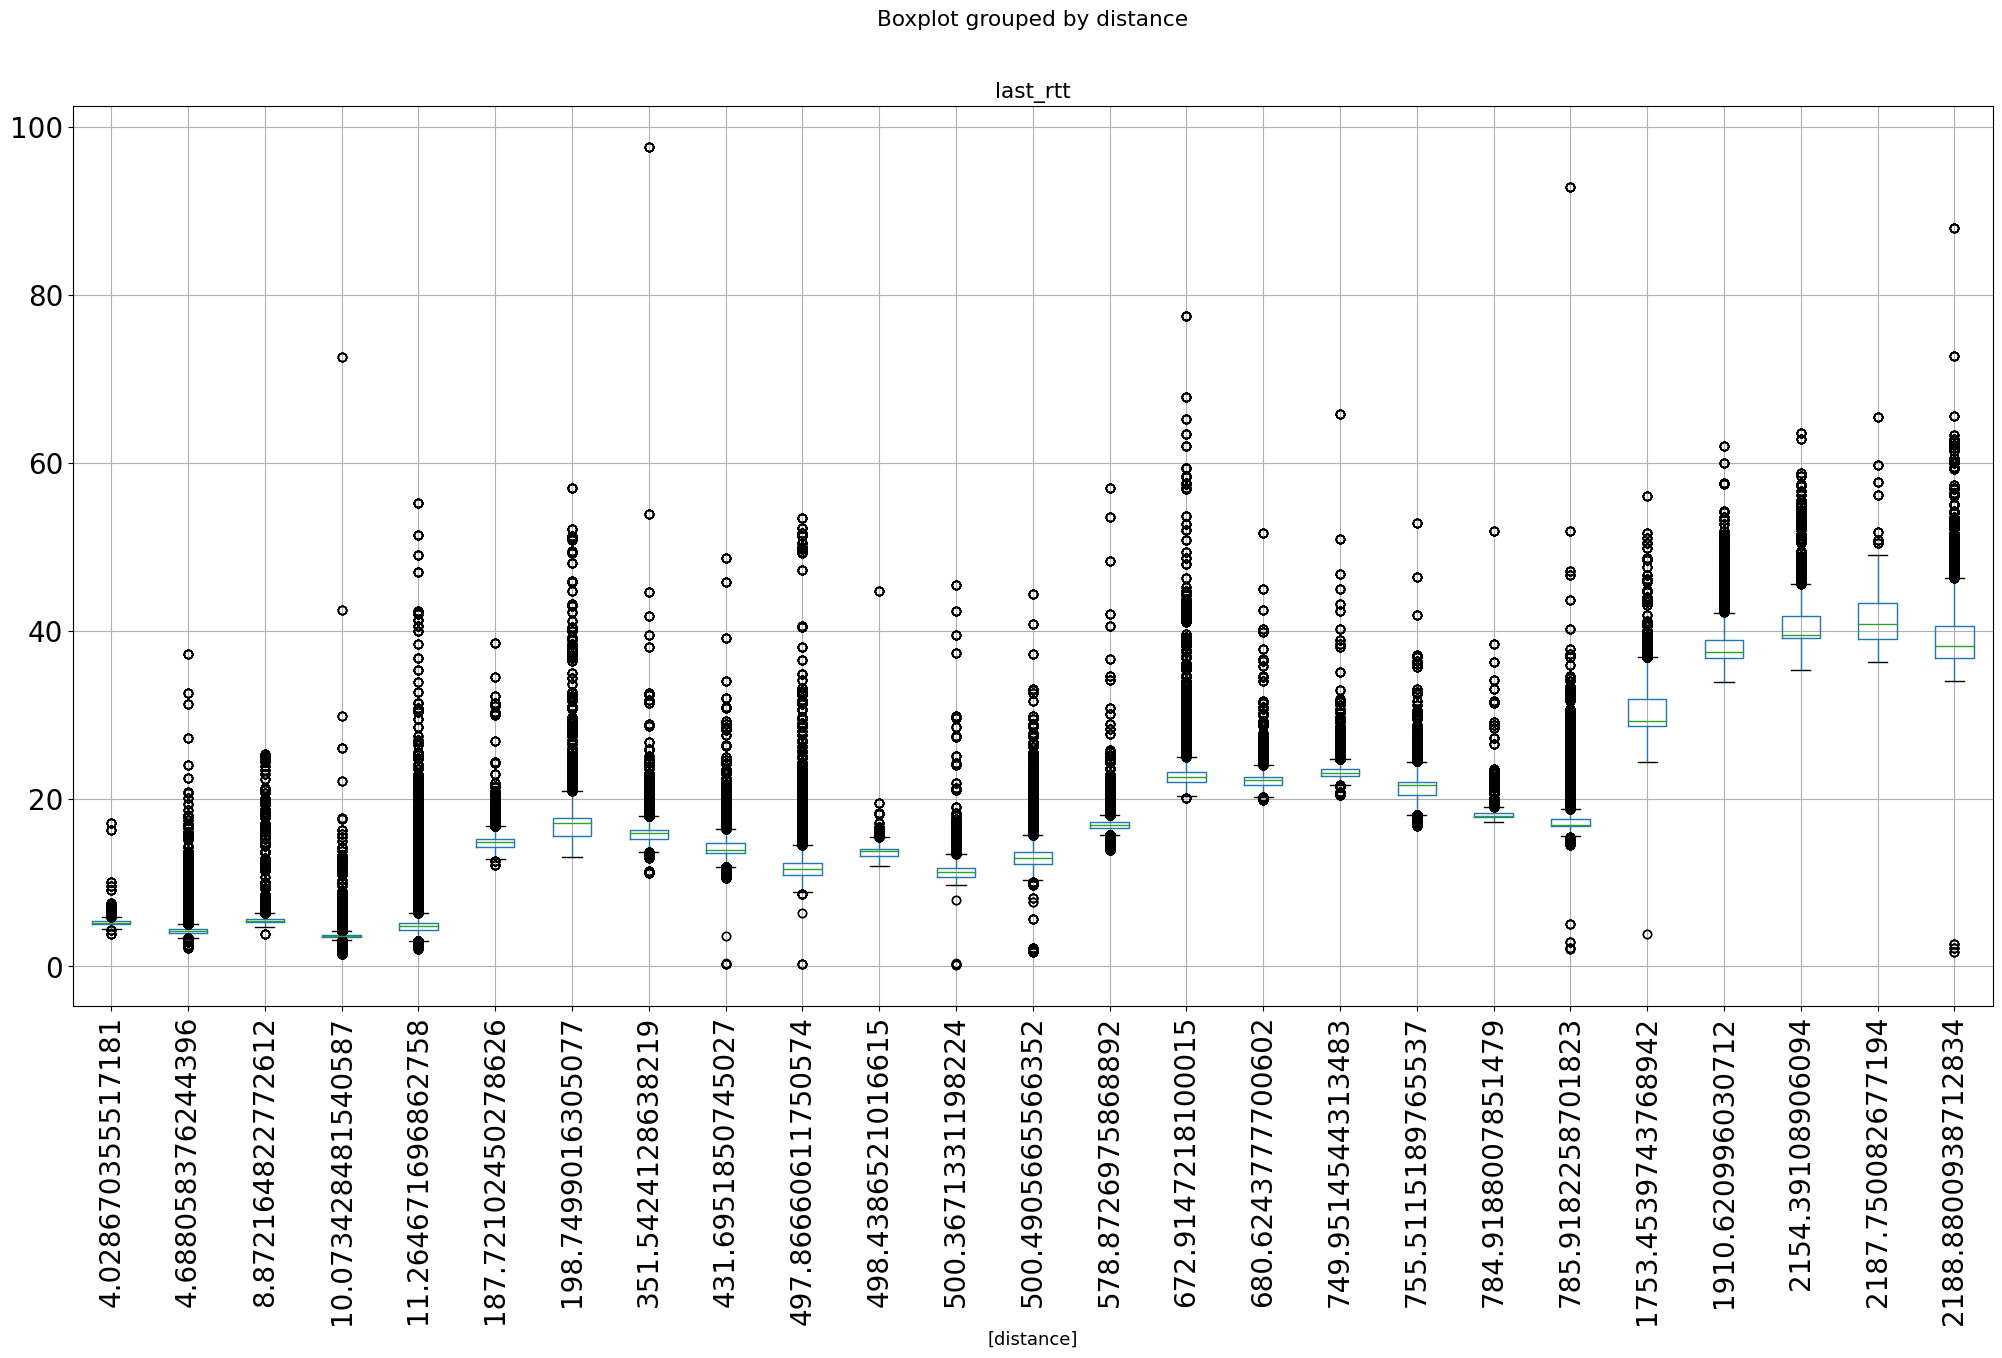

In [26]:
boxplot_df.boxplot(column='last_rtt', by=['distance'],figsize=(24,12))

#rotate the xticks
plt.xticks(rotation=90)

#increase the font size of the x and y ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#silence the printout of the boxplot object
plt.show()

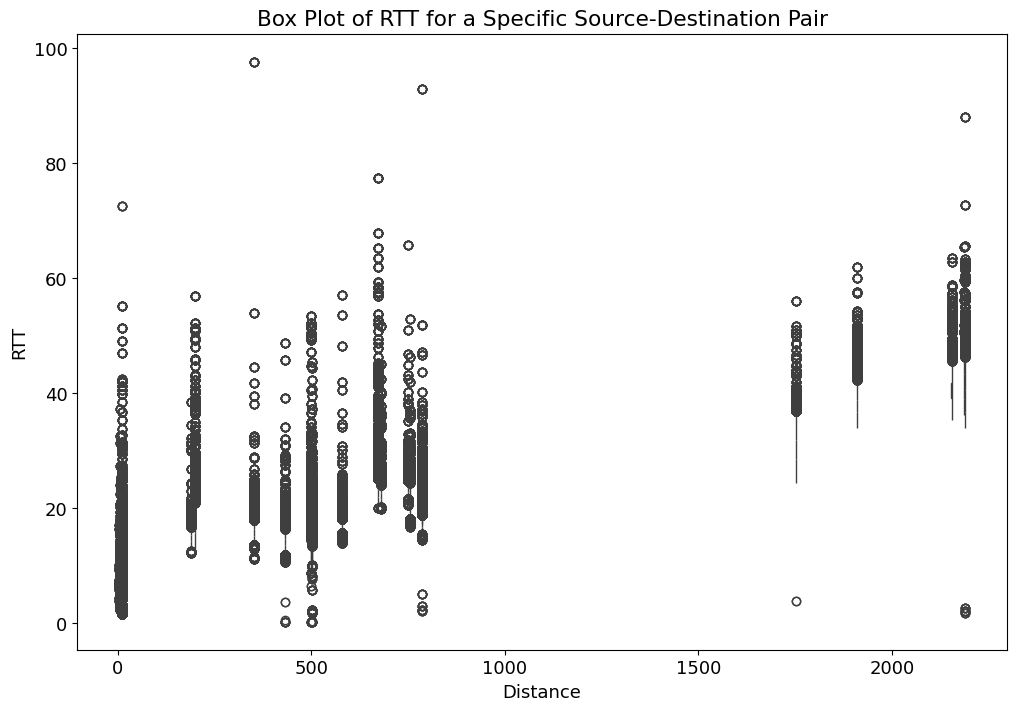

In [27]:
#boxplot for one source and destination pair
#select only the unique  source-destination pairs
unique_pairs = latency_df[['prb_id', 'dst_id']].drop_duplicates()

# Set up subplots
fig, ax = plt.subplots(figsize=(12, 8))

## to do - remove outliers from plot and add a regression line
# Iterate through each source-destination pair and create a box plot
pair_df = boxplot_df[(boxplot_df['prb_id'] == 15118) & (boxplot_df['dst_id'] == '26072')]

#remove outliers from plot
pair_df = boxplot_df

sns.boxplot(x=pair_df['distance'], y=pair_df['last_rtt'],native_scale=True)
plt.title('Box Plot of RTT for a Specific Source-Destination Pair')
plt.xlabel('Distance')
plt.ylabel('RTT')
plt.show()

/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


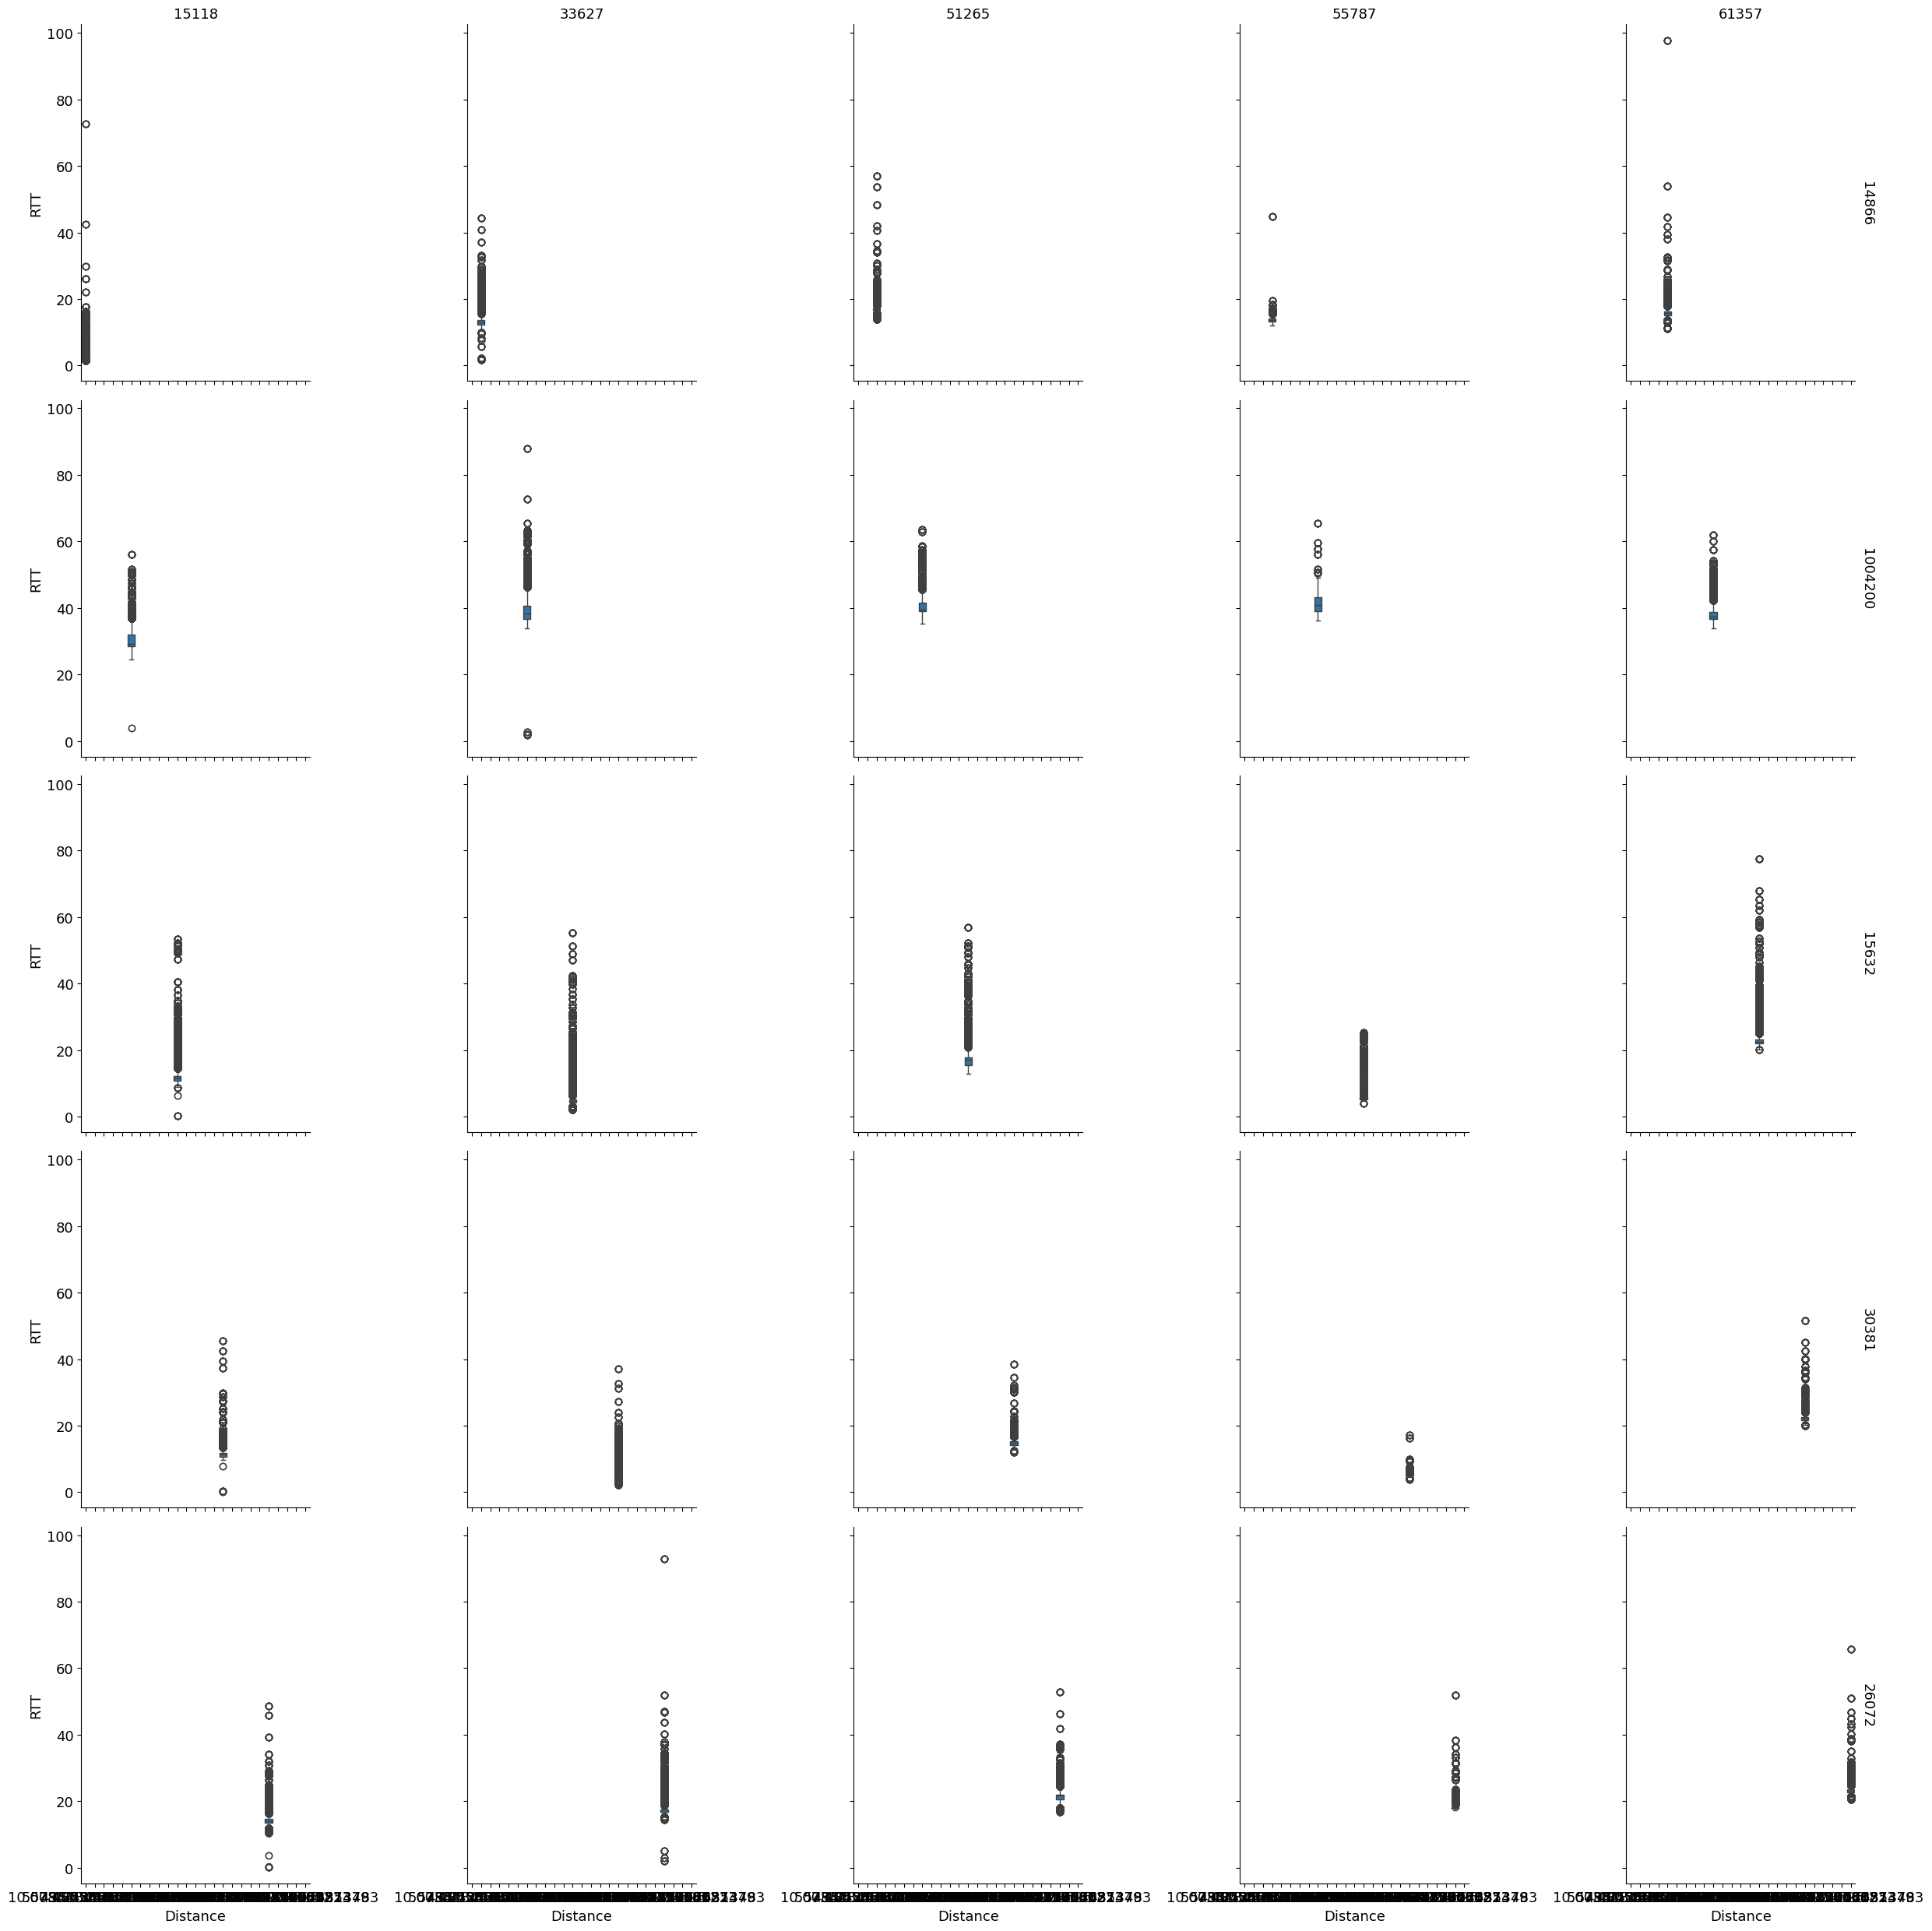

In [28]:
# Create a FacetGrid for subplots
ordered_sources = boxplot_df['prb_id'].unique().sort()
ordered_destinations = boxplot_df['dst_id'].unique().sort()

g = sns.FacetGrid(boxplot_df, col='prb_id',col_order=ordered_sources,row='dst_id',row_order=ordered_destinations,margin_titles=True, sharey=True, height=5)

# Map the boxplot onto the grid
g.map(sns.boxplot, 'distance', 'last_rtt')

# Set axis labels and titles
g.set_axis_labels('Distance', 'RTT')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()